In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statistics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from itertools import permutations
from sklearn.preprocessing import RobustScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

    X     Y
0   1   1.5
1   2  13.7
2   3   3.2
3   4   5.0
4   5   4.1
5   6   7.0
6   7   5.6
7   8  13.0
8   9  11.0
9  10   9.0


Number of samples: 10
Number of features: 2




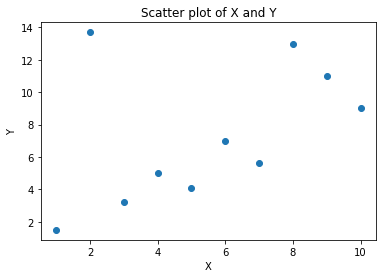

In [2]:
# Generate some sample data
#x1 = [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.,0.8]
#y1 = [0.04967142, 0.09728468, 0.28699108, 0.48563632, 0.42102911, 0.53214186, 0.82458795, 0.85452125, 0.84194145, 1.054256 ,1.6]

#x1 = [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.       ,0.8]
#y1 = [0.04967142, 0.09728468, 0.28699108, 0.48563632, 0.42102911, 0.53214186, 0.82458795, 0.85452125, 0.84194145, 1.054256 ,1.6]

x1 = [1  ,2   ,3   ,4   ,5   ,6   ,7   ,8   ,9   ,10]
y1 = [1.5,13.7 ,3.2 ,5   ,4.1 ,7   ,5.6 ,13  ,11  ,9 ]

# Combine the data into a DataFrame
x2 = pd.DataFrame({'X': x1, 'Y': y1})
s_row, s_col = x2.shape
cols = list(x2.columns)

# Print the DataFrame
print(x2)
print('\n')
print('Number of samples:', s_row)
print('Number of features:', s_col)
print('\n')

# Create a scatter plot
plt.scatter(x2['X'], x2['Y'])

# Add axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X and Y')

# Show the plot
plt.show()
x = x2

In [3]:
# Fit PCA to the data and transform the data to 1 dimension
pca = PCA(n_components=1)
X_pca = pca.fit_transform(x)

# Print the eigenvalues and eigenvectors
print("Eigenvalues:", pca.explained_variance_)
print("Eigenvectors:\n", pca.components_)


Eigenvalues: [20.51236331]
Eigenvectors:
 [[-0.44787449 -0.89409644]]


In [16]:
np.dot(x,pca.components_.T)

array([[ -1.78901915],
       [-13.14487019],
       [ -4.20473207],
       [ -6.26198015],
       [ -5.90516785],
       [ -8.94592201],
       [ -8.14206148],
       [-15.20624962],
       [-13.86593123],
       [-12.52561284]])

In [9]:
X_pca

array([[ 7.21013551],
       [-4.14571553],
       [ 4.79442259],
       [ 2.73717451],
       [ 3.09398681],
       [ 0.05323265],
       [ 0.85709318],
       [-6.20709496],
       [-4.86677657],
       [-3.52645818]])

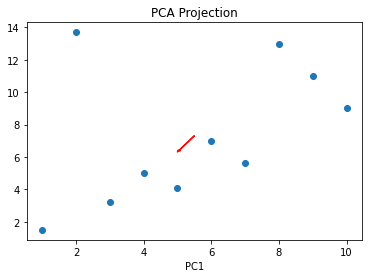

In [7]:
plt.scatter(x['X'], x['Y'])
plt.arrow(x['X'].mean(),x['Y'].mean(), pca.components_[0][0], pca.components_[0][1], color='r', width=0.03, shape='full')
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.show()

In [8]:
SF = pd.DataFrame(squareform(pdist(X_pca, metric='euclidean')))
print(f'\nSquare Form Matrix:\n{SF}')


Square Form Matrix:
           0          1          2         3         4         5         6  \
0   0.000000  11.355851   2.415713  4.472961  4.116149  7.156903  6.353042   
1  11.355851   0.000000   8.940138  6.882890  7.239702  4.198948  5.002809   
2   2.415713   8.940138   0.000000  2.057248  1.700436  4.741190  3.937329   
3   4.472961   6.882890   2.057248  0.000000  0.356812  2.683942  1.880081   
4   4.116149   7.239702   1.700436  0.356812  0.000000  3.040754  2.236894   
5   7.156903   4.198948   4.741190  2.683942  3.040754  0.000000  0.803861   
6   6.353042   5.002809   3.937329  1.880081  2.236894  0.803861  0.000000   
7  13.417230   2.061379  11.001518  8.944269  9.301082  6.260328  7.064188   
8  12.076912   0.721061   9.661199  7.603951  7.960763  4.920009  5.723870   
9  10.736594   0.619257   8.320881  6.263633  6.620445  3.579691  4.383551   

           7          8          9  
0  13.417230  12.076912  10.736594  
1   2.061379   0.721061   0.619257  
2  11.001